In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('data.csv',parse_dates=['time'])

In [2]:
data.shape

(393886, 28)

In [3]:
data.head()

,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,acc_y,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group
0,2015-11-01 20:20:16,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,...,0.061109,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1
1,2015-11-01 20:20:23,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,...,-1.209522,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1
2,2015-11-01 20:20:30,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,...,0.061109,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1
3,2015-11-01 20:20:37,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,...,0.061109,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1
4,2015-11-01 20:20:47,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,...,-1.209522,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1


In [4]:
import pickle
with open('data_df.pickle','wb') as file:
    pickle.dump(data,file)

In [5]:
with open('data_df.pickle','rb') as file:
    data_df = pickle.load(file)

对比两种加载方法

In [6]:
import time 
startTime=time.time()
data=pd.read_csv('data.csv',parse_dates=['time'])
readcsv_time=time.time()-startTime
print('read_csv time:%.2f seconds'%readcsv_time)

startTime2 = time.time()
with open('data_df.pickle','rb') as file:
    data_df = pickle.load(file)
pickleload_time = time.time() - startTime2
print ('pickleload_time：%.3f seconds' %pickleload_time)
print('pickleload_time / readcsv_time = %.3f'%(pickleload_time/readcsv_time))

read_csv time:8.53 seconds
pickleload_time：0.079 seconds
pickleload_time / readcsv_time = 0.009


从上面的运行结果可以看出，利用pickle加载数据花费时间是pd.read_csv方法加载数据花费时间的0.025倍。
利用pickle库可以保存python中的任何对象，在数据科学实践中可以用来保存重要的模型和数据。

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393886 entries, 0 to 393885
Data columns (total 28 columns):
time                   393886 non-null datetime64[ns]
wind_speed             393886 non-null float64
generator_speed        393886 non-null float64
power                  393886 non-null float64
wind_direction         393886 non-null float64
wind_direction_mean    393886 non-null float64
yaw_position           393886 non-null float64
yaw_speed              393886 non-null float64
pitch1_angle           393886 non-null float64
pitch2_angle           393886 non-null float64
pitch3_angle           393886 non-null float64
pitch1_speed           393886 non-null float64
pitch2_speed           393886 non-null float64
pitch3_speed           393886 non-null float64
pitch1_moto_tmp        393886 non-null float64
pitch2_moto_tmp        393886 non-null float64
pitch3_moto_tmp        393886 non-null float64
acc_x                  393886 non-null float64
acc_y                  393886 non-nu

In [8]:
normalTime_df= pd.read_csv('normal.csv',parse_dates = ['startTime','endTime'])
print(normalTime_df.shape)
normalTime_df.head()

(26, 2)


,startTime,endTime
0,2015-11-01 20:20:16,2015-11-03 23:47:32
1,2015-11-04 14:04:51,2015-11-04 18:26:08
2,2015-11-05 11:06:59,2015-11-09 02:44:31
3,2015-11-09 12:30:09,2015-11-09 19:23:32
4,2015-11-10 00:04:50,2015-11-15 23:03:06


In [9]:
import pandas as pd 
failureTime_df = pd.read_csv('failure.csv',parse_dates=['startTime','endTime'])
print(failureTime_df.shape)
failureTime_df.head()

(29, 2)


,startTime,endTime
0,2015-11-04 21:37:06,2015-11-04 22:29:33
1,2015-11-09 04:43:09,2015-11-09 06:35:39
2,2015-11-09 21:21:52,2015-11-09 23:14:41
3,2015-11-16 03:51:54,2015-11-16 11:06:26
4,2015-11-16 14:15:53,2015-11-16 16:08:25


 取出预测目标值为正常的样本


In [10]:
normal_list = []
for index in normalTime_df.index:
    startTime = normalTime_df.loc[index].startTime
    endTime = normalTime_df.loc[index].endTime
    part_df = data_df[data_df.time.between(startTime,endTime)]
    print(part_df.shape)
    normal_list.append(part_df)
normal_df = pd.concat(normal_list).reset_index(drop=True)
normal_df.shape

(4756, 28)
(971, 28)
(43020, 28)
(3383, 28)
(39486, 28)
(35032, 28)
(14016, 28)
(2120, 28)
(29550, 28)
(1321, 28)
(3212, 28)
(13254, 28)
(6513, 28)
(681, 28)
(12049, 28)
(2967, 28)
(19126, 28)
(561, 28)
(132, 28)
(2588, 28)
(15450, 28)
(18678, 28)
(5026, 28)
(20051, 28)
(8584, 28)
(47728, 28)


(350255, 28)

In [11]:
failure_list = []
for index in failureTime_df.index:
    startTime = failureTime_df.loc[index].startTime
    endTime = failureTime_df.loc[index].endTime
    part_df = data_df[data_df.time.between(startTime,endTime)]
    print(part_df.shape)
    failure_list.append(part_df)
failure_df = pd.concat(failure_list).reset_index(drop=True)
failure_df.shape

(443, 28)
(265, 28)
(951, 28)
(1150, 28)
(951, 28)
(106, 28)
(352, 28)
(951, 28)
(951, 28)
(1286, 28)
(951, 28)
(1254, 28)
(148, 28)
(951, 28)
(616, 28)
(951, 28)
(951, 28)
(797, 28)
(951, 28)
(951, 28)
(1244, 28)
(909, 28)
(546, 28)
(951, 28)
(592, 28)
(870, 28)
(951, 28)
(951, 28)
(951, 28)


(23892, 28)

统计正常、故障、无效样本占比

In [12]:
stat_df = pd.DataFrame({
    'number' : [normal_df.shape[0], failure_df.shape[0], data_df.shape[0]-normal_df.shape[0]-failure_df.shape[0]]
}, index = ['normal', 'failure', 'invalid'])
stat_df['ratio'] = stat_df['number'] / stat_df['number'].sum()
stat_df

,number,ratio
normal,350255,0.889229
failure,23892,0.060657
invalid,19739,0.050113


下采样

因为预测目标值为正常的样本远远多于预测目标值为故障的样本，所以对预测目标值为正常的样本做下采样。
下采样指减少样本或者减少特征，具体方法是选取一部分正常样本，数量为故障样本的2倍。

In [13]:
import random
normalPart_df = normal_df.loc[random.sample(list(normal_df.index),k=failure_df.shape[0]*2)]
normalPart_df.shape

(47784, 28)

3.6 形成特征矩阵和预测目标值

In [14]:
feature_df = pd.concat([normalPart_df,failure_df]).reset_index(drop=True)
X = feature_df.drop('time',axis=1).values
print(X.shape)
y = np.append(np.ones(len(normalPart_df)),np.zeros(len(failure_df)))
print(y.shape)

(71676, 27)
(71676,)


pickle库保存数据

In [15]:
with open('X.pickle','wb') as file:
    pickle.dump(X,file)
with open('y.pickle','wb') as file:
    pickle.dump(y,file)

模型准备

In [16]:
with open('X.pickle','rb') as file:
    X = pickle.load(file)
with open('y.pickle','rb') as file:
    y = pickle.load(file)

4.2 随机森林模型

第5行代码初始化模型对象，参数n_jobs设置为-1时，会最大化利用电脑的多线程性能；

第6行代码实例化交叉验证对象，参数n_splits设置为5，表示会做5折交叉验证；

第7行代码调用cross_val_score方法，第1个参数为模型对象，第2个参数为特征矩阵X，第3个参数为预测目标值y，第4个关键字参数cv的数据类型为整数或交叉验证对象，方法的返回结果的数据类型为ndarray对象；

第8行代码，ndarray对象的round方法可以使其中的数保留指定位数。


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

rfc_model = RandomForestClassifier(n_jobs=-1)
cv_split = ShuffleSplit(n_splits=5)
score_ndarray = cross_val_score(rfc_model,X,y,cv=cv_split)
print(score_ndarray.round(4))
print(score_ndarray.mean().round(4))

C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

[1.     1.     1.     0.9999 1.    ]
1.0


In [18]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)
xgb_model = XGBClassifier(thread=12)
xgb_model.fit(train_X,train_y)
xgb_model.score(test_X,test_y).round(4)

0.9802

5.2 混淆矩阵

In [19]:
from sklearn.metrics import confusion_matrix
predict_y = xgb_model.predict(test_X)
labels = ['故障','正常']
pd.DataFrame(confusion_matrix(test_y,predict_y),columns=labels,index=labels)

,故障,正常
故障,4666,113
正常,171,9386


5.3 precision、recall、f1-score、support报告表

In [24]:
from sklearn.metrics import precision_recall_fscore_support

def eval_model(y_true,y_pred,labels):
    p,r,f1,s = precision_recall_fscore_support(y_true,y_pred)
    tot_p = np.average(p,weights=s)
    tot_r = np.average(r,weights=s)
    tot_f1 = np.average(f1,weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label':labels,
        u'Precision':p,
        u'Recall':r,
        u'F1':f1,
        u'Support':s 
    })
    res2 = pd.DataFrame({
        u'Label':['总体'],
        u'Precision':[tot_p],
        u'Recall':[tot_r],
        u'F1':[tot_f1],
        u'Support':[tot_s]
    })
    res2.index=[999]
    res = pd.concat([res1,res2])
    return res[['Label','Precision','Recall','F1','Support']]
eval_model(test_y,predict_y,labels)

,Label,Precision,Recall,F1,Support
0,故障,0.964648,0.976355,0.970466,4779
1,正常,0.988104,0.982107,0.985097,9557
999,总体,0.980285,0.980190,0.980219,14336


5.4 绘制ROC曲线

Text(0, 0.5, 'True positive rate')

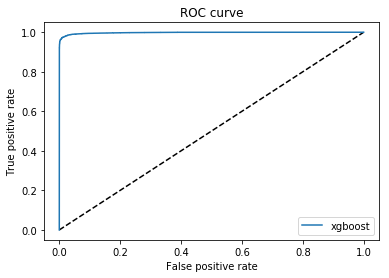

In [28]:
from sklearn.metrics import roc_curve

predict_y_probablity = xgb_model.predict_proba(X)
false_predict,true_predict,thresholds = roc_curve(y,predict_y_probablity[:,1])
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(false_predict,true_predict,label='xgboost')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


5.5 模型保存

利用pickle库的dump方法保存

In [31]:
with open('xgb_model.pickle','wb') as file:
    pickle.dump(xgb_model,file)

6.模型测试

6.1 模型加载

In [33]:
with open('xgb_model.pickle','rb') as file:
    xgb_model = pickle.load(file)

In [37]:

test_df = pd.read_csv('data_test.csv', index_col=0)
exam_y = test_df['clf'].values
exam_X = test_df.drop(['time', 'clf'], axis=1).values
exam_X = exam_X[exam_y<2]
print(exam_X.shape)
exam_y = exam_y[exam_y<2]
print(exam_y.shape)

(179567, 27)
(179567,)


In [38]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
 
def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]
 
predict_exam_y = xgb_model.predict(exam_X)
labels = ['故障', '正常']
eval_model(exam_y, predict_exam_y, labels)

,Label,Precision,Recall,F1,Support
0,故障,0.438611,0.245817,0.315060,10638
1,正常,0.953786,0.980187,0.966806,168929
999,总体,0.923266,0.936681,0.928195,179567
